In [485]:
from generate import generateLorenz
import numpy as np
import torch
import matplotlib.pyplot as plt


# # generate_ramped_lorenz

# generate lorenz data
y, (true_y, true_x, true_D) = generateLorenz(T=1000, x0=np.array([-0.9,10,10]), noise_std=10)

y_ = (y-y.mean())/(y.std())
# y_ = y
Y = [torch.tensor(y_).float()] 
Y = [y_] 


In [486]:
Y

[array([[-0.26870101, -0.33582242, -0.10424736, ..., -1.10531052,
          1.51382728, -0.04113038],
        [ 0.31225914,  0.40747971,  0.36672041, ..., -0.56134104,
          0.80580286,  0.31658789],
        [-0.33665943,  0.48903873,  0.45008099, ..., -0.23322756,
          0.63371203,  0.54010221],
        ...,
        [ 2.31441578,  1.23379473,  0.74091871, ..., -0.88478192,
          0.39906975, -0.12015   ],
        [ 1.76806291,  0.20199359,  0.62337804, ..., -0.88556752,
          0.31182279,  0.48460798],
        [ 1.95135395,  0.09107248,  0.05324703, ..., -1.2534071 ,
         -0.22329978,  0.33037396]])]

In [542]:
from generate import generate_ramped_lorenz


Y, X, speed = generate_ramped_lorenz(3)



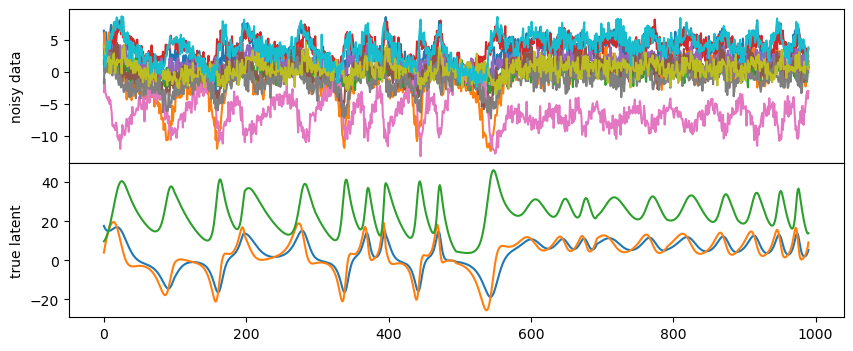

In [566]:
fig, axs = plt.subplots(2,1,figsize=(10,4))
axs[0].plot(Y[0])
axs[0].set_ylabel("noisy data")
# axs[1].plot(true_x)
axs[1].plot(X[0])
axs[1].set_ylabel("true latent")
plt.subplots_adjust(hspace=0)
plt.show()




In [567]:
import pdLDS 
import offset
import importlib
importlib.reload(pdLDS)
importlib.reload(offset)

# importlib.reload(offset)






<module 'offset' from '/Users/yenho/Documents/Georgia Tech/SIP lab/dLDS/pdLDS/offset.py'>

In [568]:
# torch.clamp(self.dynamics.grad, -1, 1)

# torch.nn.utils.clip_grad_norm(self.dynamics, -1, 1)

In [572]:
emissions_dim, latent_dim, n_dynamic_operators = 10, 3, 4

pdlds = pdLDS.pdLDS(emissions_dim, latent_dim, n_dynamic_operators)

In [573]:
S = 200 # offset window size
# S = 70

pdlds.fit(Y, S, smooth_c=True, 
                  emissions_lr = 1e-2, 
                  dynamics_lr = 1e-2, 
                  train_iters=40, 
                  weight_decay=1, 
                  init_iters=20,
                  init_smoothness=5, 
                  xi=100)






Initializing weights with 20 iterations


ELBO: --:   0%|          | 0/20 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

Training with  40 iterations


ELBO: --:   0%|          | 0/40 [00:00<?, ?it/s]

ELBO (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

KeyboardInterrupt: 

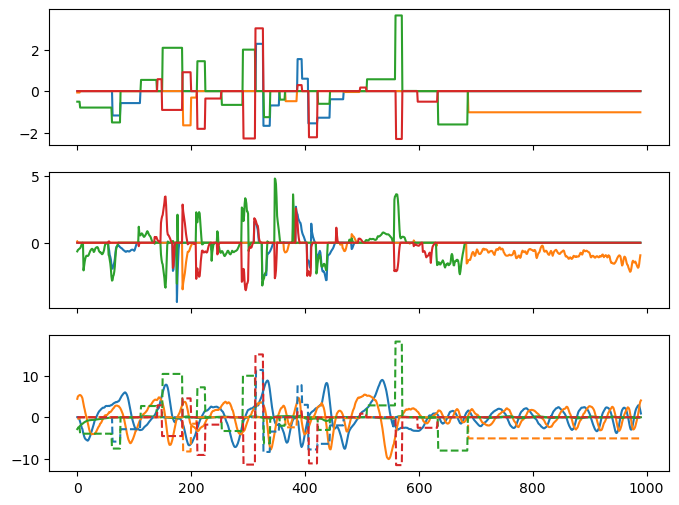

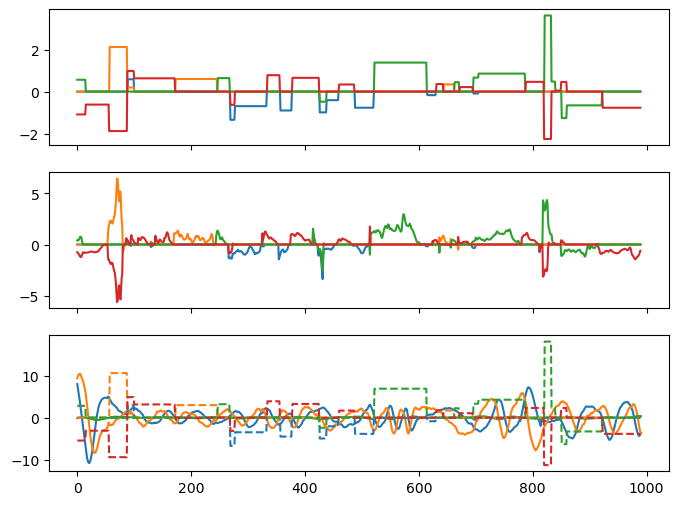

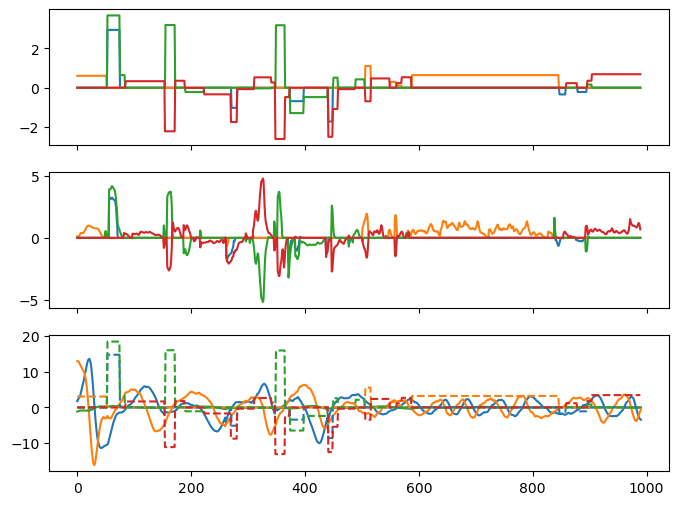

In [575]:
ix = 1
for ix in range(3):
    fig, axs = plt.subplots(3,1, figsize=(8,6), sharex=True)
    axs[0].plot(pdlds.coefs[ix], )
    axs[0].set_prop_cycle(None)
    axs[1].plot(pdlds.coefs_filt[ix],)
    # plt.show()
    
    
#     axs[1].set_ylim(-2,2)
    axs[2].plot(pdlds.latent[ix])
    axs[2].set_prop_cycle(None)
#     axs[2].plot(pdlds.coefs_filt[ix])
    axs[2].plot(pdlds.coefs[ix]*5, "--")
    plt.show()

In [510]:
ix = 0
c_filt = pdlds.coefs_filt[ix]
latent = pdlds.latent[ix]
sigmas = pdlds.sigmas

w = 10
support = (c_filt.abs() > 1e-4)
ss = smooth_support_channelwise(support, w)
basis = smooth_support_acrosschannels(ss,w)


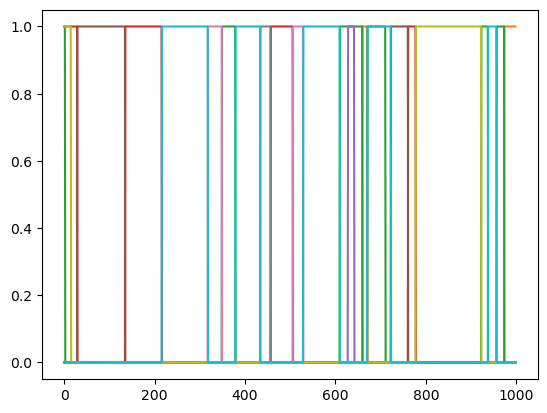

In [511]:
plt.plot(basis)

In [161]:


# c_filt = pdlds.coefs_filt[0]

# xdot = latent[1:] - latent[:-1]


# ixs = group_consecutive_ixs(ss)



def sparseSmoother3(c_filt, sigmas, basis):
    sigmas = torch.diagonal(sigmas, dim1=1, dim2=2)
    ix = torch.where(sigmas.sum(1) == 0)[0]
    sigmas[ix] = torch.ones_like(sigmas[ix])*1e-8

#     c_filt = dlds.coefs_filt[0]

    c_smooth = torch.zeros_like(c_filt)
    s_smooth = torch.zeros_like(sigmas)
    c_smooth[-1] = c_filt[-1]
    s_smooth[-1] = sigmas[-1]

    T = len(c_smooth)

    for t in range(T-1, 0, -1):

        c_t1 = c_smooth[t]
        c_t0 = c_filt[t-1]
        
        s_t1 = basis[t]
        s_t0 = basis[t-1]

        sig_t1 = s_smooth[t]
        sig_t0 = sigmas[t-1]

#         s_t1 = c_t1.abs() > 1e-5
#         s_t0 = c_t0.abs() > 1e-5
        s_smooth[t-1] = s_t1.float()*sig_t1 * sig_t0/(sig_t1 + sig_t0)+(1-s_t1.float())*sig_t0*10000
        c_smooth[t-1] = s_t1.float()*(c_t1 * sig_t0 + c_t0 * sig_t1)/(sig_t1 + sig_t0)+(1-s_t1.float())*c_t0

        if c_smooth[t-1].isnan().sum():
            print("C SMOOTHIN NAN", c_smooth[t-1], s_t1, s_t0, sig_t1, sig_t0)
            break

    return c_smooth, s_smooth

cs_, sig_s_ = sparseSmoother3(c_filt, sigmas, basis)



In [464]:
def impute_c_dynamics(c_filt, basis, impute_val, thresh=1e-2):
    c_mod = torch.zeros_like(c_filt)
    c_mod[((c_filt * basis).abs() < thresh)] = impute_val[((c_filt * basis).abs() < thresh)]
    c_mod[((c_filt * basis).abs()>=  thresh)] = c_filt[((c_filt * basis).abs()>=  thresh)]
    return c_mod

c_mod = impute_c_dynamics(c_filt, basis, lstsq)
    

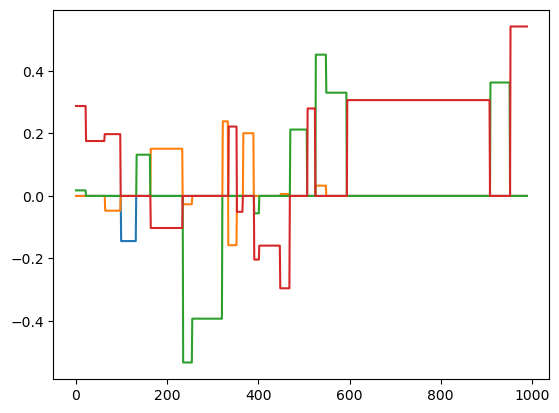

In [413]:
plt.plot(lstsq)

In [418]:
def sparseSmoother4(c_filt, sigmas, basis):
    sigmas = torch.diagonal(sigmas, dim1=1, dim2=2)
    ix = torch.where(sigmas.sum(1) == 0)[0]
    sigmas[ix] = torch.ones_like(sigmas[ix])*1e-8

    #     c_filt = dlds.coefs_filt[0]

    c_smooth = torch.zeros_like(c_filt)
    s_smooth = torch.zeros_like(sigmas)
    c_smooth[-1] = c_filt[-1]
    s_smooth[-1] = sigmas[-1]

    T = len(c_smooth)

    for t in range(T-1, 0, -1):

        c_t1 = c_smooth[t]
        c_t0 = c_filt[t-1]

        s_t1 = basis[t]
        s_t0 = basis[t-1]
    #     s_t0 = basis[t-1]


        sig_t1 = s_smooth[t]
        sig_t0 = sigmas[t-1] + 1

        
    #     + torch.ones_like(sigmas[t-1])*s_t1.float()*sigmas[basis].mean()*0.0001
    #     sig_t0 = sigmas[t-1]
    #     + torch.ones_like(sigmas[t-1])*s_t0.float()*sigmas[basis].mean()*0.0001
    #     s_t1 = c_t1.abs() > 1e-5
    #     s_t0 = c_t0.abs() > 1e-5
    #         print(t, c_t0, c_t1, s_t1)
        s_smooth[t-1] = s_t1.float()*sig_t1 * sig_t0/(sig_t1 + sig_t0)+(1-s_t1.float())*sig_t0*10000
        c_smooth[t-1] = s_t1.float()*(c_t1 * sig_t0 + c_t0 * sig_t1)/(sig_t1 + sig_t0)+(1-s_t1.float())*c_t0

    #     if c_smooth[t-1].isnan().sum():
    #         print("C SMOOTHIN NAN", c_smooth[t-1], s_t1, s_t0, sig_t1, sig_t0)
    #         break
    return c_smooth, s_smooth

In [425]:
ix = 1



# c_mod = torch.zeros_like(c_filt)
# thresh = c_filt[basis].abs().mean()*0.2
# thresh = 1e-2
# c_mod[((c_filt * basis).abs() < thresh)] = lstsq[((c_filt * basis).abs() < thresh)]
# c_mod[((c_filt * basis).abs()>=  thresh)] = c_filt[((c_filt * basis).abs()>=  thresh)]



# c_filt = c_mod
c_filt = pdlds.coefs_filt[ix]
latent = pdlds.latent[ix]
xdot = latent[1:] - latent[:-1]
sigmas = pdlds.sigmas

w = 10
support = (c_filt.abs() > 1e-4)
ss = smooth_support_channelwise(support, w)
basis = smooth_support_acrosschannels(ss,w)

impute_val = solve_segmented_restricted_lstsq(basis, xdot, pdlds.dynamics, latent)
c_mod = predict_c_dynamics(c_filt, basis, impute_val)
c_smooth, s_smooth = sparseSmoother4(c_mod, sigmas, basis)






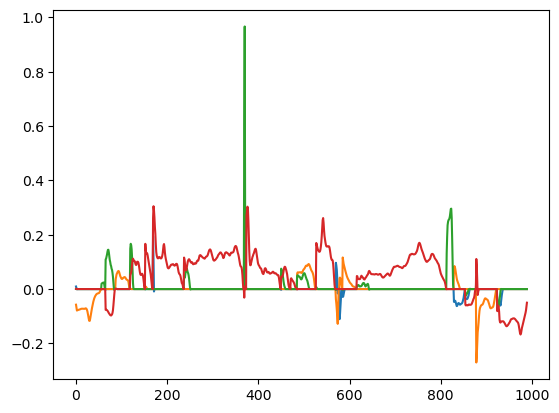

In [449]:
c_filt = pdlds.coefs_filt[ix]
plt.plot(c_filt)
plt.show()

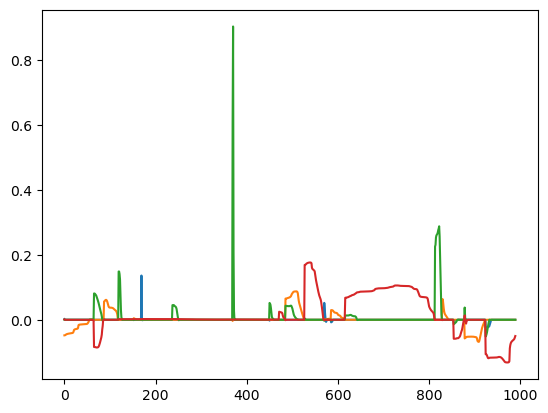

In [450]:
c = pdlds.coefs[ix]
plt.plot(c)
plt.show()

In [404]:
(c_smooth.abs().sum(1) < 1e-2)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

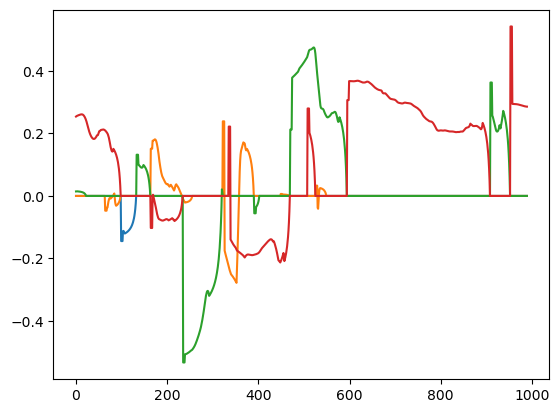

In [408]:
# plt.plot(c_filt)
plt.plot(c_smooth)
plt.show()

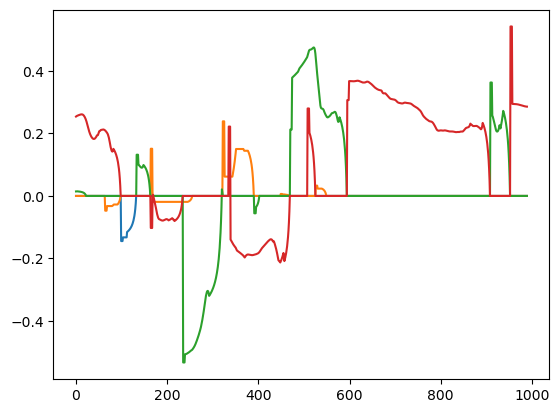

In [368]:
# plt.plot(c_filt)
plt.plot(c_smooth)
plt.show()

In [416]:
def solve_segmented_restricted_lstsq(basis, y, dynamics, x):

    ixs = group_consecutive_ixs(basis)

    values = []
    for k, (i,j) in enumerate(zip(ixs[:-1], ixs[1:])):
        
        ix1 = i.int()
        ix2 = j.int()
        if ix2 - ix1 == 1: # TODO: this is a hack to avoid extremely short sequences
            ix2 = np.min([j.int().item() +1, len(basis)-1])
            if ix2 == len(basis)-1:
                ix1 = i.int() - 2



        n_basis = basis[ix2].sum().item()
        obs = y[ix1:ix2] 
        dos = dynamics[basis[ix2]].data
        if n_basis == 1:

                phis = (dos @ x[ix1:ix2][:,:,None]).squeeze()
                phis_ = phis.flatten()
                obs_ = obs.flatten()
                c_ = torch.linalg.lstsq( phis_[:,None], obs_[:,None])[0].flatten()
    #             c_ = torch.nn.Parameter(torch.randn(1))

        # phis = phis.transpose(1,2)
        else:
            # print(ix2-ix1)
            
            phis = (dos[None,:] @ x[ix1:ix2][:,None,:, None]).squeeze()
            phis = phis.transpose(1,2)
            phis_ = phis.reshape(phis.shape[0]*phis.shape[1],n_basis)
            obs_ = obs.flatten()[:,None]
            c_ = torch.linalg.lstsq(phis_, obs_)[0].flatten()
            
#         print(k, i, j, c_)

        values.append([ix1.item(), ix2.item(), c_, basis[ix2]])

    c_infer = torch.zeros_like(c_filt)

    for (ix1, ix2, value, bs) in values:
        temp = torch.zeros_like(c_infer[ix1:ix2])
        temp[:,bs] = temp[:,bs]+value
        c_infer[ix1:ix2] = temp


    c_infer[-1] = c_infer[-2]
    c_infer *= basis
    return c_infer


In [313]:
ixs = group_consecutive_ixs(basis)
ixs

tensor([  0.,  18.,  58.,  93., 127., 158., 229., 251., 316., 329., 349., 361.,
        385., 398., 443., 464., 502., 520., 545., 589., 903., 947., 989.])

In [314]:
basis[-100:]

tensor([[False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        [Fal

In [321]:
xdot = latent[1:]-latent[:-1]
lstsq = solve_segmented_restricted_lstsq(basis, xdot, pdlds.dynamics, latent)


# plt.plot()

# plt.plot(latent)

0 tensor(0.) tensor(22.) tensor([0.0178, 0.2878])
1 tensor(22.) tensor(63.) tensor([0.1757])
2 tensor(63.) tensor(98.) tensor([-0.0472,  0.1977])
3 tensor(98.) tensor(132.) tensor([-0.1444])
4 tensor(132.) tensor(163.) tensor([0.1319])
5 tensor(163.) tensor(234.) tensor([ 0.1510, -0.1025])
6 tensor(234.) tensor(255.) tensor([-0.0265, -0.5329])
7 tensor(255.) tensor(321.) tensor([-0.3927])
8 tensor(321.) tensor(334.) tensor([0.2387])
9 tensor(334.) tensor(353.) tensor([-0.1575,  0.2220])
10 tensor(353.) tensor(366.) tensor([-0.0508])
11 tensor(366.) tensor(390.) tensor([0.2007])
12 tensor(390.) tensor(402.) tensor([-0.0556, -0.2036])
13 tensor(402.) tensor(448.) tensor([-0.1590])
14 tensor(448.) tensor(469.) tensor([ 0.0063, -0.2954])
15 tensor(469.) tensor(507.) tensor([0.2124])
16 tensor(507.) tensor(525.) tensor([0.2799])
17 tensor(525.) tensor(549.) tensor([0.0329, 0.4520])
18 tensor(549.) tensor(594.) tensor([0.3304])
19 tensor(594.) tensor(908.) tensor([0.3066])
20 tensor(908.) te

In [342]:
def group_consecutive_ixs(x):
    ixs_ = torch.where((x.float()[1:]-x.float()[:-1]).abs().sum(1) != 0)[0]
    ixs = torch.zeros(len(ixs_)+2)
    ixs[1:-1] = ixs_
    ixs[-1] = len(x)-1
    return ixs

x = basis

# ixs_ = torch.where((x.float()[1:]-x.float()[:-1]).sum(1) != 0)[0]
# ixs = torch.zeros(len(ixs_)+2)
# ixs[1:-1] = ixs_
# ixs[-1] = len(x)-1

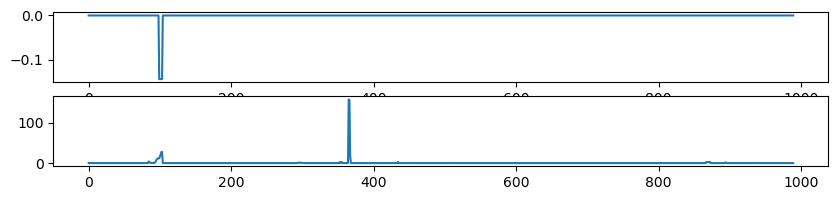

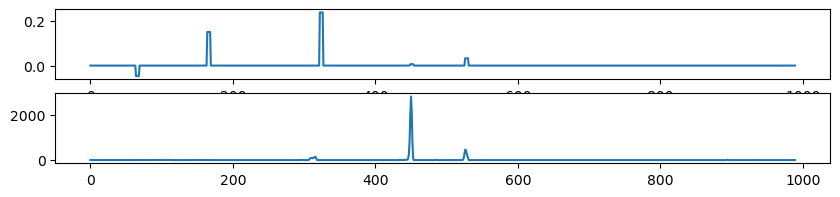

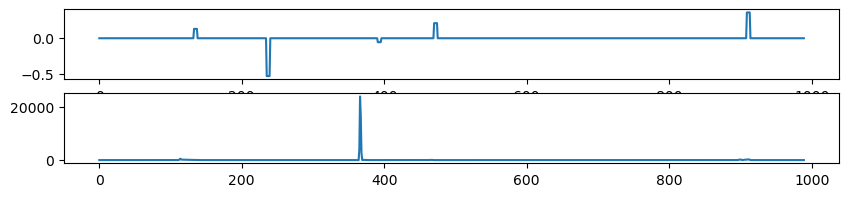

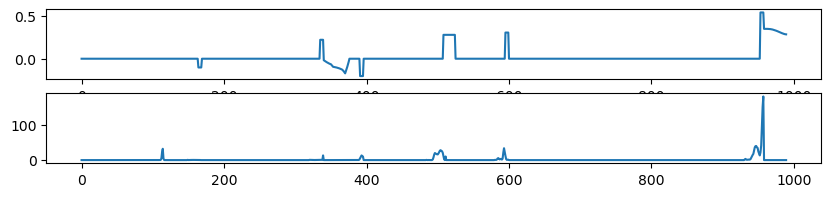

In [351]:
for k in range(4):

    fig, axs = plt.subplots(2,1, figsize=(10,2))
    axs[0].plot(c_smooth.T[k])
    # plt.show()
    axs[1].plot(s_smooth.T[k])
    plt.show()

In [327]:
(c_smooth.abs().sum(1) < 1e-2).sum()

tensor(13)

In [262]:
# (x.float()[1:]-x.float()[:-1])[-100:]

In [263]:
# lstsq[-100:]

In [267]:
# for b in basis.T:
#     plt.plot(b)
#     plt.show()

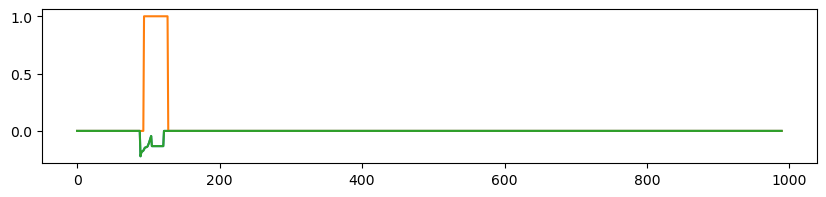

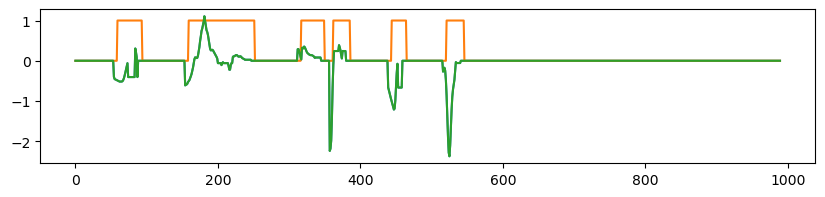

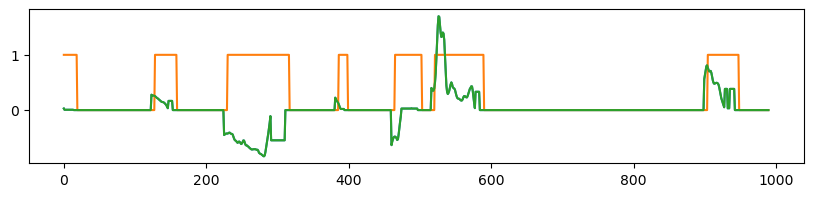

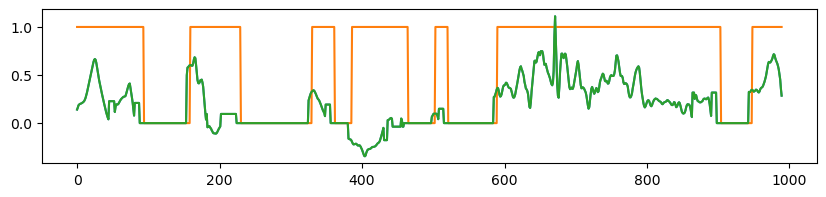

In [307]:
for i in range(4):
    plt.figure(figsize=(10,2))
    plt.plot(c_filt.T[i])




# plt.figure(figsize=(10,2))
    plt.plot(basis.T[i])
    plt.plot(c_mod.T[i])
    plt.show()

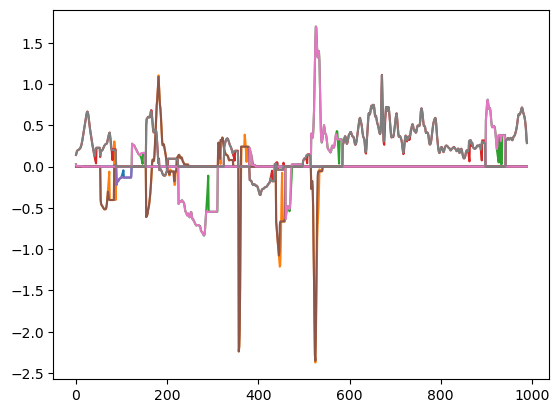

In [308]:
plt.plot(c_filt)
plt.plot(c_smooth)

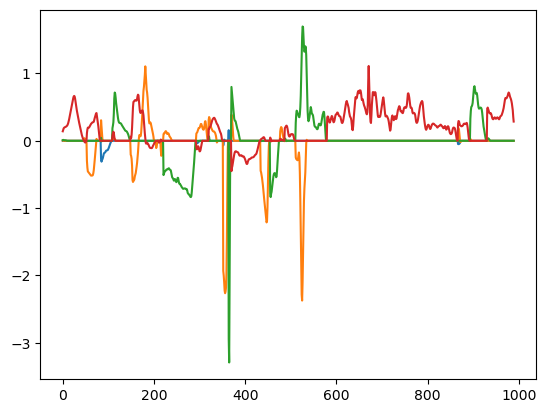

tensor([ True,  True, False, False])

In [177]:
c_filt

tensor([[-1.1147e-03,  3.2049e-03,  1.0690e-02,  1.4110e-01],
        [-1.5947e-04,  4.5725e-04,  1.2971e-02,  1.6071e-01],
        [-2.0383e-06,  6.1503e-06,  1.2435e-02,  1.8526e-01],
        ...,
        [-2.8901e-11,  1.3106e-11,  9.0428e-12,  4.5401e-01],
        [-3.1471e-11,  1.5714e-11,  6.6759e-12,  3.5804e-01],
        [-3.5376e-11,  1.9071e-11,  4.8561e-12,  2.8571e-01]])

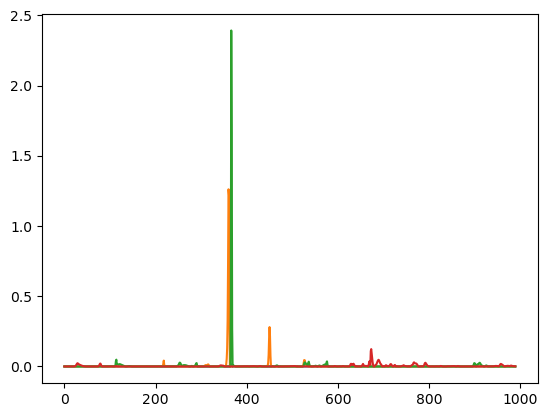

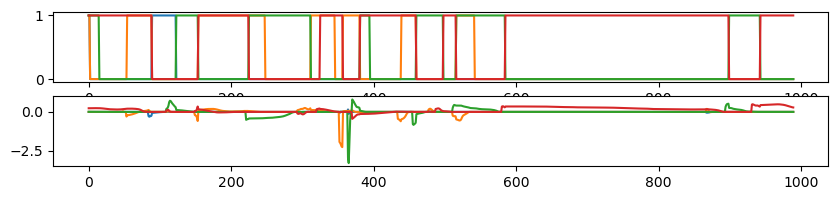

In [197]:
fig, axs = plt.subplots(2,1, figsize=(10,2))
axs[0].plot(basis)
axs[1].plot(c_smooth)
plt.show()



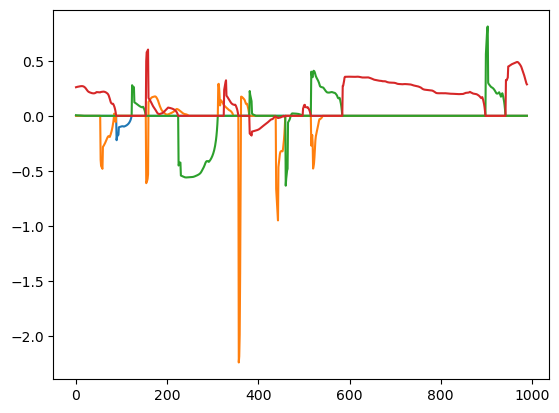

In [300]:

plt.plot(c_smooth)



In [167]:
basis[len(c_filt)-1]

tensor([False, False, False,  True])

In [165]:
sigmas

tensor([[[ 1.3930e-05,  4.4988e-06,  1.3292e-05,  1.5221e-06],
         [ 4.4988e-06,  1.1470e-04, -3.8224e-05,  2.9922e-05],
         [ 1.3292e-05, -3.8224e-05,  4.1413e-05, -1.6799e-05],
         [ 1.5221e-06,  2.9922e-05, -1.6799e-05,  2.0521e-05]],

        [[ 1.2238e-06,  4.6887e-08,  1.2426e-06,  1.1172e-07],
         [ 4.6887e-08,  1.0145e-05, -3.5326e-06,  2.1733e-06],
         [ 1.2426e-06, -3.5326e-06,  2.0724e-05, -9.9170e-06],
         [ 1.1172e-07,  2.1733e-06, -9.9170e-06,  1.7858e-05]],

        [[ 2.5107e-08,  1.5235e-11,  2.7976e-08,  1.6975e-09],
         [ 1.5235e-11,  2.0995e-07, -7.9596e-08,  4.1476e-08],
         [ 2.7976e-08, -7.9596e-08,  2.1300e-05, -9.8579e-06],
         [ 1.6975e-09,  4.1476e-08, -9.8579e-06,  1.7888e-05]],

        ...,

        [[ 9.9995e-13,  1.8337e-22,  1.2129e-22,  3.6304e-13],
         [ 1.8337e-22,  1.0000e-12, -5.6343e-23, -9.8323e-14],
         [ 1.2129e-22, -5.6343e-23,  1.0000e-12, -2.5273e-13],
         [ 3.6304e-13, -9.8323e-14,

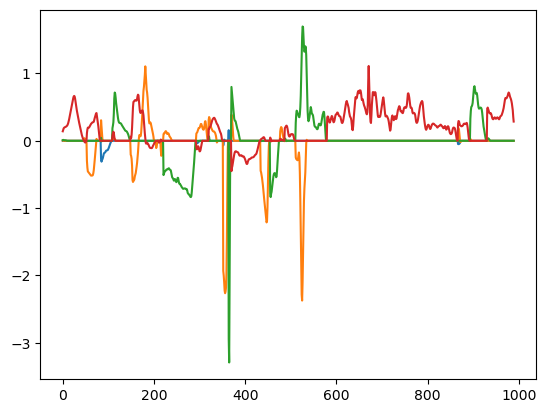

In [164]:
plt.plot(c_filt)

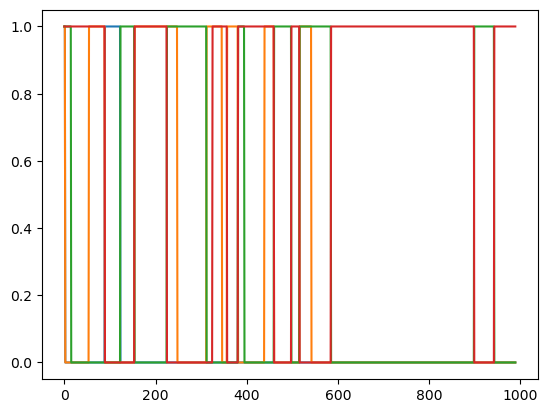

In [163]:
plt.plot(basis)

In [648]:
n_basis = bs2[ix2].sum().item()
if n_basis == 1:
        c_ = torch.nn.Parameter(torch.randn(1,1))
else:
        c_ = torch.nn.Parameter(torch.randn(n_basis),)
opt = torch.optim.SGD([c_], lr=1e0)


obs.shape, phis.shape

for i in range(100):
    opt.zero_grad()
    obs_pred = (phis @ c_[None,:,None]).squeeze()
    loss = ((obs - obs_pred)**2).mean()
    loss.backward()
    opt.step()
    print(i, loss.item())



RuntimeError: Expected size for first two dimensions of batch2 tensor to be: [44, 2] but got: [44, 1].

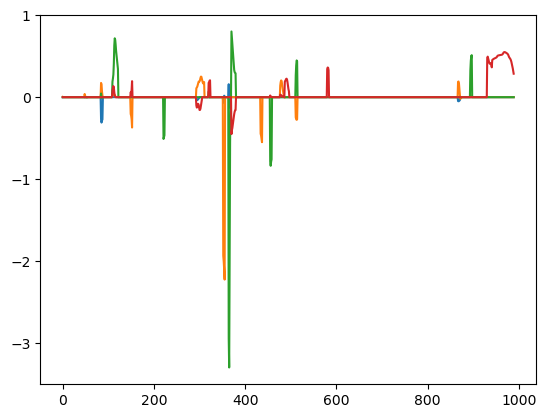

In [162]:
plt.plot(cs_)
plt.show()

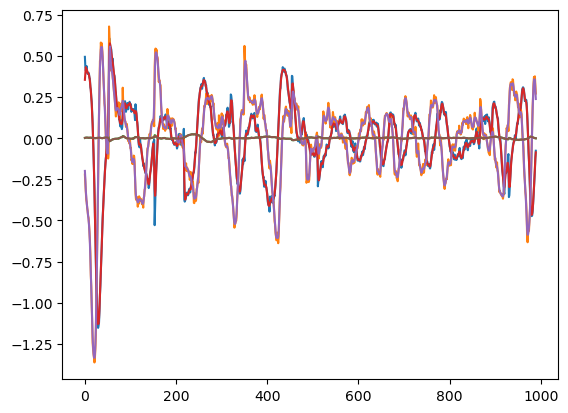

In [148]:
x = pdlds.latent[-1]

plt.plot(x[1:]-x[:-1])

plt.plot(pdlds.xdot)

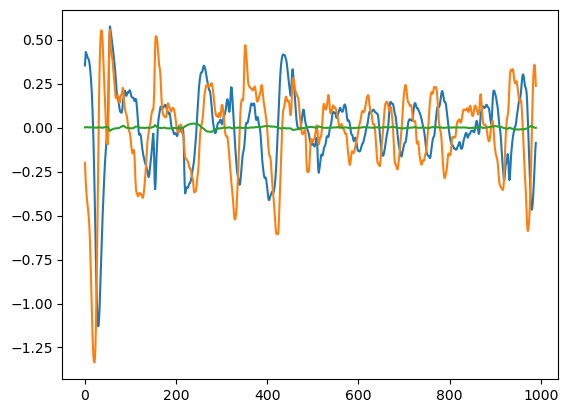

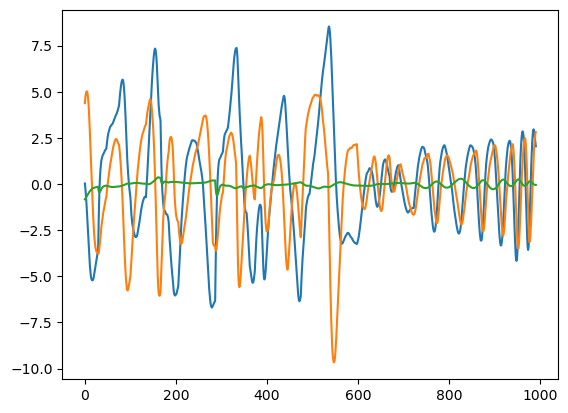

In [140]:

plt.plot(pdlds.latent[0])

In [ ]:
self = pdlds

In [ ]:
pdlds.Sx

In [ ]:
# for k, c in enumerate():
c = self.coefs[0]

fig, axs =plt.subplots(2,1, figsize=(10,4), sharex=True)
axs[0].plot(true_x)
axs[1].plot(c)
plt.show()

In [ ]:
# for k, c in enumerate():
c = self.coefs_filt[0]

fig, axs =plt.subplots(2,1, figsize=(10,2), sharex=True)
axs[0].plot(true_x)
axs[1].plot(c)
plt.show()

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(pdlds.latent[0]+ pdlds.offsets[0])
plt.show()

In [ ]:
plt.plot(pdlds.xdot)

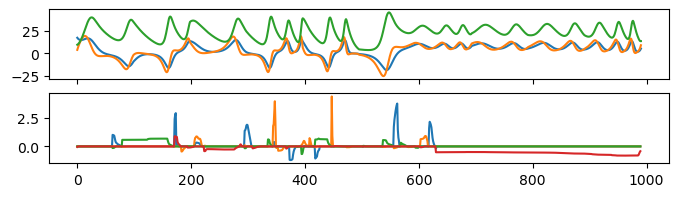

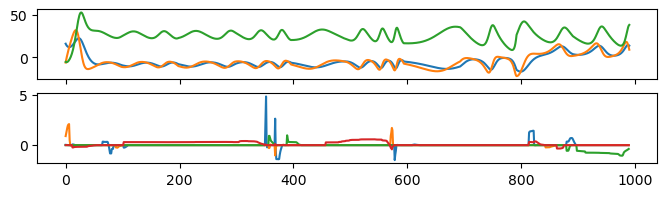

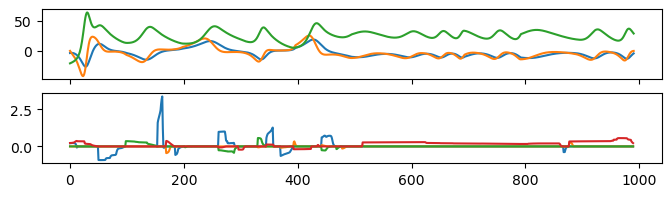

In [35]:

self = pdlds
for k, c in enumerate(self.coefs):

    fig, axs =plt.subplots(2,1, figsize=(8,2), sharex=True)
    axs[0].plot(X[k])
    axs[1].plot(c)
    plt.show()


In [43]:
# estimate basis
latent = pdlds.latent[0]
c_filt = pdlds.coefs_filt[0]

xdot = latent[1:] - latent[:-1]

w = 10


# smoooth channel-wise
support = (c_filt.abs() > 1e-4)
support_smooth = torch.zeros_like(support)
for i in range(len(support)-w):
    support_smooth[i+w//2] = torch.round(support[i:i+w+1].float().mean(0))

for i in range(w//2):
    support_smooth[i] = support[i]
    support_smooth[-i] = support[-i]


In [100]:
def smooth_support_channelwise(support, w):
    support_smooth = torch.zeros_like(support)
    for i in range(len(support)-w):
        support_smooth[i+w//2] = torch.round(support[i:i+w+1].float().mean(0))

    for i in range(w//2):
        support_smooth[i] = support[i]
        support_smooth[-i] = support[-i]

    return support_smooth

def smooth_support_acrosschannels(support, w, rate_threshold=0.05 ):
    rates = torch.zeros(len(support))
    # support_smooth = torch.zeros_like(support)
    for i in range(len(support)-w):
    #     support_smooth[i+w//2] = torch.round(support[i:i+w+1].float().mean(0))

        b_ = support[i:i+w+1]
        rate = (b_.float()[1:] - b_.float()[:-1] != 0).sum(1).float().mean()
        rates[i+w//2] = rate


    support_smooth = torch.clone(support)
    for i in torch.where(rates > rate_threshold)[0]:
        support_smooth[i] = support_smooth[i - 1]

    for i in range(len(support_smooth)-3):
        l = support_smooth[i:i+3].float().mean(0)
        support_smooth[i+1] = torch.round(l)
    support_smooth[0] = support_smooth[1]
    support_smooth[-2] = support_smooth[-1]
    return support_smooth

def solve_segmented_restricted_lstsq(basis, y, dynamics, x):

    ixs = group_consecutive_ixs(basis)

    values = []
    for k, (i,j) in enumerate(zip(ixs[:-1], ixs[1:])):
        ix1 = i.int()
        ix2 = j.int()
        if ix2 - ix1 == 1: # TODO: this is a hack to avoid extremely short sequences
            ix2 = np.min([j.int().item() +1, len(basis)-1])
            if ix2 == len(basis)-1:
                ix1 = i.int() - 2



        n_basis = basis[ix2].sum().item()
        obs = y[ix1:ix2] 
        dos = dynamics[basis[ix2]].data
        if n_basis == 1:

                phis = (dos @ x[ix1:ix2][:,:,None]).squeeze()
                phis_ = phis.flatten()
                obs_ = obs.flatten()
                c_ = torch.linalg.lstsq( phis_[:,None], obs_[:,None])[0]
    #             c_ = torch.nn.Parameter(torch.randn(1))

        # phis = phis.transpose(1,2)
        else:
            # print(ix2-ix1)
            self.phis = phis = (dos[None,:] @ x[ix1:ix2][:,None,:, None]).squeeze()
            phis = phis.transpose(1,2)
            phis_ = phis.reshape(phis.shape[0]*phis.shape[1],n_basis)
            obs_ = obs.flatten()[:,None]
            c_ = torch.linalg.lstsq(phis_, obs_)[0].flatten()

        values.append([ix1.item(), ix2.item(), c_, basis[ix2]])

    c_infer = torch.zeros_like(c_filt)

    for (ix1, ix2, value, bs) in values:
        temp = torch.zeros_like(c_infer[ix1:ix2])
        temp[:,bs] = temp[:,bs]+value
        c_infer[ix1:ix2] = temp


    c_infer[-1] = c_infer[-2]
    c_infer *= basis
    return c_infer





latent = pdlds.latent[0]
c_filt = pdlds.coefs_filt[0]

xdot = latent[1:] - latent[:-1]


w = 10
support = (c_filt.abs() > 1e-4)
ss = smooth_support_channelwise(support, w)
ss = smooth_support_acrosschannels(ss,w)

ixs = group_consecutive_ixs(ss)

In [129]:
ixs = group_consecutive_ixs(basis)

values = []
for k, (i,j) in enumerate(zip(ixs[:-1], ixs[1:])):
    ix1 = i.int()
    ix2 = j.int()
    if ix2 - ix1 == 1: # TODO: this is a hack to avoid extremely short sequences
        ix2 = np.min([j.int().item() +1, len(basis)-1])
        if ix2 == len(basis)-1:
            ix1 = i.int() - 2



    n_basis = basis[ix2].sum().item()
    obs = y[ix1:ix2] 
    dos = dynamics[basis[ix2]].data
    if n_basis == 1:

            phis = (dos @ x[ix1:ix2][:,:,None]).squeeze()
            phis_ = phis.flatten()
            obs_ = obs.flatten()
            c_ = torch.linalg.lstsq( phis_[:,None], obs_[:,None])[0]
#             c_ = torch.nn.Parameter(torch.randn(1))

    # phis = phis.transpose(1,2)
    else:
        # print(ix2-ix1)
        phis = (dos[None,:] @ x[ix1:ix2][:,None,:, None]).squeeze()
        phis = phis.transpose(1,2)
        phis_ = phis.reshape(phis.shape[0]*phis.shape[1],n_basis)
        obs_ = obs.flatten()[:,None]
        c_ = torch.linalg.lstsq(phis_, obs_)[0].flatten()

    values.append([ix1.item(), ix2.item(), c_, basis[ix2]])

c_infer = torch.zeros_like(basis.float())

for (ix1, ix2, value, bs) in values:
    temp = torch.zeros_like(c_infer[ix1:ix2])
    temp[:,bs] = temp[:,bs]+value
    c_infer[ix1:ix2] = temp


c_infer[-1] = c_infer[-2]
c_infer *= basis

In [130]:
c_infer

tensor([[ 0.0000,  0.0000, -0.3177,  0.0585],
        [ 0.0000,  0.0000, -0.3177,  0.0585],
        [ 0.0000,  0.0000, -0.3177,  0.0585],
        ...,
        [ 0.0000,  0.0000,  0.0000, -0.0488],
        [ 0.0000,  0.0000,  0.0000, -0.0488],
        [ 0.0000,  0.0000,  0.0000, -0.0488]])

In [92]:
latent.shape

torch.Size([991, 3])

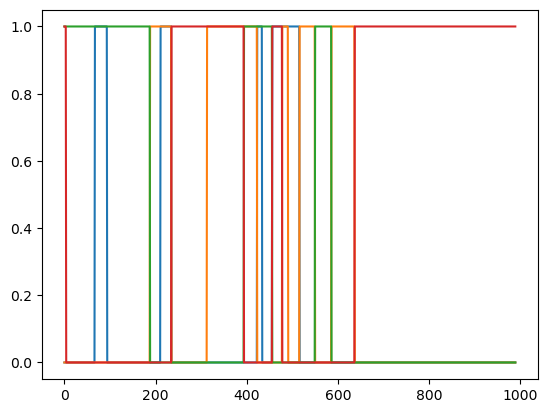

In [93]:
plt.plot(ss)

tensor([[ True,  True,  True,  True],
        [False, False,  True,  True],
        [False, False,  True,  True],
        ...,
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True]])

tensor([  0.,   3.,  66.,  93., 210., 234., 312., 433., 455., 490., 989.])

In [95]:
ixs_ = torch.where((ss.float()[1:]-ss.float()[:-1]).sum(1) != 0)[0]


# if ixs_[0] == 0:

#     ixs[:-1] = ixs_
# else:
ixs = torch.zeros(len(ixs_)+2)
ixs[1:-1] = ixs_
ixs[-1] = len(ss)-1






In [96]:
ixs

tensor([  0.,   3.,  66.,  93., 210., 234., 312., 433., 455., 490., 989.])

In [109]:

basis, y, dynamics, x = ss, xdot, self.dynamics, latent




c_segment_lstsq = solve_segmented_restricted_lstsq(basis, y, dynamics, x)



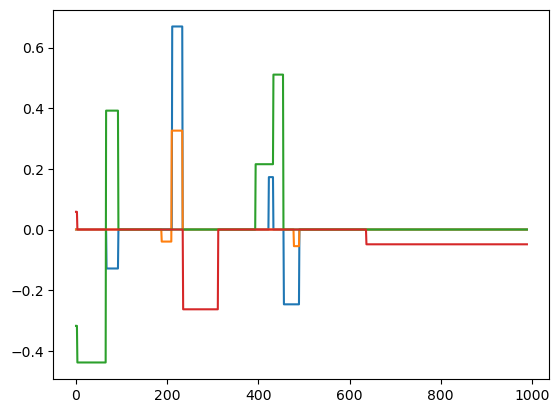

In [110]:

plt.plot(c_segment_lstsq)

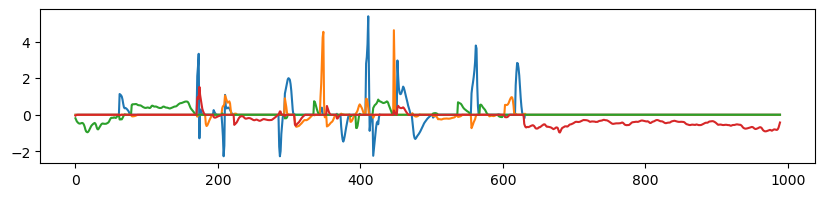

In [70]:


# get_support



plt.figure(figsize=(10,2))
plt.plot(c_filt)


In [75]:
ss.sum(1)

torch.Size([990])

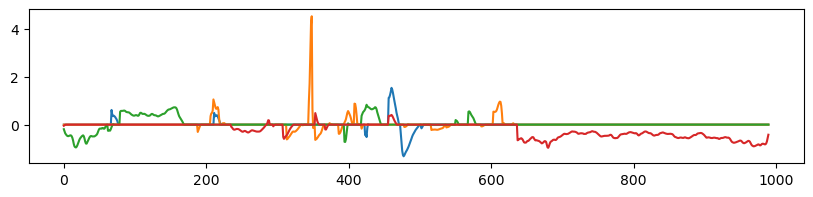

In [71]:
plt.figure(figsize=(10,2))
plt.plot(ss*c_filt)

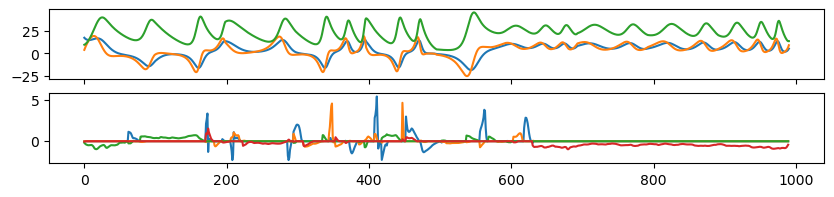

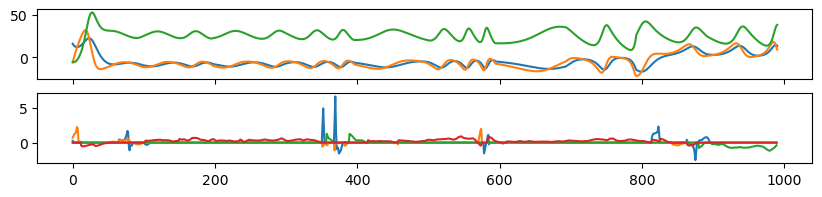

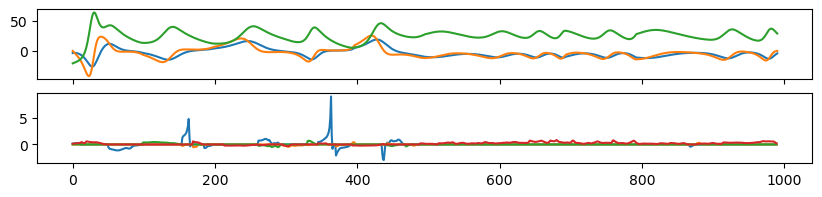

In [36]:
for k, c in enumerate(self.coefs_filt):

    fig, axs =plt.subplots(2,1, figsize=(10,2), sharex=True)
    axs[0].plot(X[k])
    axs[1].plot(c)
    plt.show()


In [ ]:
def initial_smooth(self, c_filt, latent, w=5):
        x_ = latent

        boo = (c_filt.abs() > 1e-3)
        binary_smooth = torch.zeros_like(boo)

        for i in range(len(boo)-w):
            binary_smooth[i+w//2] = torch.round(boo[i:i+w+1].float().mean(0))

        for i in range(w//2):
            binary_smooth[i] = boo[i]
            binary_smooth[-i] = boo[-i]



        rates = torch.zeros(len(binary_smooth))
        bs2 = torch.zeros_like(binary_smooth)
        for i in range(len(bs2)-w):
            l = binary_smooth[i:i+w+1].float().mean(0)
            bs2[i+w//2] = torch.round(l)

            b_ = binary_smooth[i:i+w+1]
            rate = (b_.float()[1:] - b_.float()[:-1] != 0).sum(1).float().mean()
            rates[i+w//2] = rate



        bs2 = torch.clone(binary_smooth)
        for i in torch.where(rates > 0.05)[0]:
            bs2[i] = bs2[i - 1]

        for i in range(len(bs2)-3):
            l = bs2[i:i+3].float().mean(0)
            bs2[i+1] = torch.round(l)

        ixs_ = torch.where((bs2.float()[1:]-bs2.float()[:-1]).sum(1) != 0)[0]

        ixs = torch.zeros(len(ixs_)+2)
        ixs[1:-1] = ixs_
        ixs[-1] = len(bs2)-1



        values = []
        for k, (i,j) in enumerate(zip(ixs[:-1], ixs[1:])):
            ix1 = i.int()
            ix2 = j.int()


            n_basis = bs2[ix2].sum().item()
            obs = self.xdot[ix1:ix2] 
            dos = self.dynamics[bs2[ix2]].data
            if n_basis == 1:

        #             phis = (dos[None,:] @ x_[ix1:ix2][:,None,:, None])
                    phis = (dos @ x_[ix1:ix2][:,:,None]).squeeze()
                    phis_ = phis.flatten()
                    obs_ = obs.flatten()
                    c_ = torch.linalg.lstsq( phis_[:,None], obs_[:,None])[0]
        #             c_ = torch.nn.Parameter(torch.randn(1))

            # phis = phis.transpose(1,2)
            else:
                phis = (dos[None,:] @ x_[ix1:ix2][:,None,:, None]).squeeze()
                phis = phis.transpose(1,2)
                phis_ = phis.reshape(phis.shape[0]*phis.shape[1],n_basis)
                obs_ = obs.flatten()[:,None]

                c_ = torch.linalg.lstsq(phis_, obs_)[0].flatten()
            values.append([ix1.item(), ix2.item(), c_, bs2[ix2]])

        c_infer = torch.zeros_like(c_filt)

        for (ix1, ix2, value, bs) in values:
            temp = torch.zeros_like(c_infer[ix1:ix2])
            temp[:,bs] = temp[:,bs]+value
            c_infer[ix1:ix2] = temp


        c_infer[-1] = c_infer[-2]

        return c_infer
    
c_filt = pdlds.coefs_filt[0]
#     l = bs2[i:i+3].float().mean(0)
#     bs2[i+1] = torch.round(l)
    
    
cs_ = initial_smooth(self, c_filt, pdlds.latent[0])
    

In [ ]:
pdlds.Sx

In [ ]:
c = pdlds.coefs_filt[0]
cs = pdlds.coefs[0]

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(c)
plt.show()


fig, axs = plt.subplots(2,1, figsize=(10,4),sharex=True)
# plt.figure(figsize=(10,2))
axs[0].plot(cs)




# plt.figure(figsize=(10,2))/
axs[1].plot(true_x)
plt.show()

In [ ]:
plt.plot(cs_)

In [ ]:
plt.plot(cs_)
plt.show()

In [ ]:
plt.plot()

In [ ]:
plt.plot(cs)

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(pdlds.xdot)
plt.show()

In [ ]:
boo = (c.abs() > 1e-3)
binary_smooth = torch.zeros_like(boo)
w =10
for i in range(len(boo)-w):
    binary_smooth[i+w//2] = torch.round(boo[i:i+w+1].float().mean(0))
    
for i in range(w//2):
    binary_smooth[i] = boo[i]
    binary_smooth[-i] = boo[-i]

In [ ]:
w = 10

rates = torch.zeros(len(binary_smooth))
bs2 = torch.zeros_like(binary_smooth)
for i in range(len(bs2)-w):
    l = binary_smooth[i:i+w+1].float().mean(0)
    bs2[i+w//2] = torch.round(l)
    
    b_ = binary_smooth[i:i+w+1]
    rate = (b_.float()[1:] - b_.float()[:-1] != 0).sum(1).float().mean()
    rates[i+w//2] = rate
    

In [ ]:

bs2 = torch.clone(binary_smooth)
for i in torch.where(rates > 0.05)[0]:
    bs2[i] = bs2[i - 1]
    
for i in range(len(bs2)-3):
    l = bs2[i:i+3].float().mean(0)
    bs2[i+1] = torch.round(l)
    
#     l = bs2[i:i+3].float().mean(0)
#     bs2[i+1] = torch.round(l)
    
    

In [ ]:
# plt.plot(bs2)

In [ ]:
bs2[-10:]

In [ ]:
binary_smooth[i:i+w+1].float().mean(0)

In [ ]:
for i,j  in zip(boo.T, bs2.T):
    plt.figure(figsize=(10,2))
    plt.plot(i, alpha=0.3)    
    plt.plot(j)

    plt.show()

In [ ]:
for i in bs2.T:
    plt.figure(figsize=(10,2))
    plt.plot(i)

    plt.show()

In [ ]:
plt.plot(bs2)

plt.xlim(0, 400)

In [ ]:
# plt.plot()
# plt.xlim(0, 400)



# np.where()[0]

    
    



In [ ]:
bs2[:10]

In [ ]:
for i in range(w):
    break
i

In [ ]:
bs2[i]

In [ ]:

plt.figure(figsize=(10,2))
plt.plot(bs2)
# plt.xlim(0, 400)

In [ ]:
plt.plot(c)
plt.xlim(66,167)

In [ ]:
ixs_ = torch.where((bs2.float()[1:]-bs2.float()[:-1]).sum(1) != 0)[0]

ixs = torch.zeros(len(ixs_)+2)
ixs[1:-1] = ixs_
ixs[-1] = len(bs2)-1

In [ ]:

for i,j in zip(ixs[:-1], ixs[1:]):
    ix1 = i.int()
    ix2 = j.int()
    
    
c[ix1:ix2]

In [ ]:
self = pdlds

In [ ]:
# basis



obs, phi

In [ ]:
bs2[ix2]

In [ ]:
plt.plot(bs2,alpha=0.4)

In [ ]:
# obs = pdlds.xdot[ix1:ix2] 
# dos = self.dynamics[bs2[ix2]].data
# phis = (dos[None,:] @ x_[ix1:ix2][:,None,:, None])
# # phis = phis.transpose(1,2)

In [ ]:
phis.shape

In [ ]:
values = []
for k, (i,j) in enumerate(zip(ixs[:-1], ixs[1:])):
    ix1 = i.int()
    ix2 = j.int()


    n_basis = bs2[ix2].sum().item()
    obs = pdlds.xdot[ix1:ix2] 
    dos = self.dynamics[bs2[ix2]].data
    if n_basis == 1:

#             phis = (dos[None,:] @ x_[ix1:ix2][:,None,:, None])
            phis = (dos @ x_[ix1:ix2][:,:,None]).squeeze()
            phis_ = phis.flatten()
            obs_ = obs.flatten()
            c_ = torch.linalg.lstsq( phis_[:,None], obs_[:,None])[0]
#             c_ = torch.nn.Parameter(torch.randn(1))

    # phis = phis.transpose(1,2)
    else:
        phis = (dos[None,:] @ x_[ix1:ix2][:,None,:, None]).squeeze()
        phis = phis.transpose(1,2)
        phis_ = phis.reshape(phis.shape[0]*phis.shape[1],n_basis)
        obs_ = obs.flatten()[:,None]

        c_ = torch.linalg.lstsq(phis_, obs_)[0].flatten()
    values.append([ix1.item(), ix2.item(), c_, bs2[ix2]])

#         c_ = torch.nn.Parameter(torch.randn(n_basis),)


#     if n_basis == 1:
#         phis = (dos[None,:] @ x_[ix1:ix2][:,None,:, None])
#     else:
#         phis = (dos[None,:] @ x_[ix1:ix2][:,None,:, None]).squeeze()
#         phis = phis.transpose(1,2)
        
        

#     c2_ = torch.nn.Parameter(torch.randn(n_basis),)
#     opt = torch.optim.SGD([c2_], lr=1e-1, momentum=0.2)


#     obs.shape, phis.shape

#     for i in range(1000):
#         opt.zero_grad()
#         obs_pred = (phis @ c2_[None,:,None]).squeeze()
#         loss = ((obs - obs_pred)**2).mean()
#         loss.backward()
#         opt.step()
#         print(i, loss.item())

#     phis_ = phis.reshape(phis.shape[0]*phis.shape[1],n_basis)
#     obs_ = obs.flatten()[:,None]

#     c_ = torch.linalg.lstsq(phis_, obs_)[0].flatten()


    print(j.item(), c_.data)
        


In [ ]:
values

In [ ]:


c_infer = torch.zeros_like(c)

for (ix1, ix2, value, bs) in values:
    temp = torch.zeros_like(c_infer[ix1:ix2])
    temp[:,bs] = temp[:,bs]+value
    c_infer[ix1:ix2] = temp


c_infer[-1] = c_infer[-2]
#     break
    
# c_infer[ix1:ix2][:,bs]

In [ ]:
plt.plot(c)
plt.show()
plt.plot(c_infer)
plt.show()

In [ ]:
dos.shape

In [ ]:
phis = (dos @ x_[ix1:ix2][:,:,None]).squeeze()
phis_ = phis.flatten()
obs_ = obs.flatten()
c_ = torch.linalg.lstsq( phis_[:,None], obs_[:,None])[0]

obs_.shape, phis_.shape

In [ ]:
phis.shape, n_basis

In [ ]:
obs_pred

In [ ]:
# c_[None,:,None].shape
phis.shape

In [ ]:
c_[None,:,None].shape

In [ ]:
phis.shape

In [ ]:
x_ = pdlds.latent[0]

phi = (dos @ x_[ix1:ix2][:,:,None]).squeeze()

In [ ]:
x_[ix1:ix2]

In [ ]:
obs, phi

In [ ]:
plt.plot(c*bs2)

In [ ]:

plt.figure(figsize=(10,2))
plt.plot(true_x*0.01)
plt.plot(bs2)
# plt.xlim(0, 400)

In [ ]:
rates

In [ ]:
plt.plot(bs2)
plt.xlim(0, 400)

In [ ]:
# plt.figure(figsize=(10,2))

# plt.plot(cs_)
# plt.show()

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(pdlds.latent[0])
plt.show()

In [ ]:
# plt.figure(figsize=(10,2))
# plt.plot()
# plt.show()

from cDynamics import sparseSmoother3

c = pdlds.coefs_filt[0]
cs = pdlds.coefs[0]

b = (c.abs() < 1e-3).sum(1) == 0

# c[b]

# c[torch.where(b)[0]+1]
# c[torch.where(b)[0]] = c[torch.where(b)[0]-1]




c_, _ = sparseSmoother3(c*binary_smooth, pdlds.sigmas)


# pdlds.sigmas

plt.figure(figsize=(10,2))
plt.plot(c)
plt.show()


In [ ]:
# c_, _ = sparseSmoother3(c*binary_smooth, pdlds.sigmas)


plt.figure(figsize=(10,2))
plt.plot(c*binary_smooth.float())
plt.show()

In [ ]:
((binary_smooth.float()[1:] - binary_smooth.float()[:-1]) != 0).sum(1)

In [ ]:
cs, _ = sparseSmoother3(c, pdlds.sigmas)


plt.figure(figsize=(10,2))
plt.plot(cs)
plt.show()

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(c)
# plt.plot(cs)
# plt.plot((cs.abs() > 1e-3).sum(1) == 0)
plt.show()


plt.figure(figsize=(10,2))
plt.plot(cs)
# plt.ylim(-1.3,2.3)
plt.show()



plt.figure(figsize=(10,2))
plt.plot(true_x)
# plt.ylim(-1.3,2.3)
plt.show()




In [ ]:
plt.plot(c.abs() > 1e-3)
plt.show()

In [ ]:
c = pdlds.coefs_filt[0]
c_ = c * binary_smooth.float()




plt.figure(figsize=(10,2))
plt.plot(c_)
plt.show()

In [ ]:
c_, c

In [ ]:
c_ == c

In [ ]:

plt.figure(figsize=(10,2))
plt.plot(c)
plt.show()

In [ ]:
counts = np.zeros(4)
rle = []
old_value = boo[0].int()
for i in boo[1:]:
    value = i.int()
    counts[value == old_value] += 1
    
    ix = np.where(value != old_value)[0]
    
    print(value, counts)
    counts[ix] = 0
    old_value = torch.clone(value)
#     if len(ix):
#         break
    
    
    


value, old_value, value == old_value




In [ ]:
for i, j,k,l in zip(binary_smooth.T, boo.T, c.T, cs.T):
    plt.figure(figsize=(10,2))
    plt.plot(i, alpha=0.4)
    plt.plot(j, alpha=0.4)
    plt.plot(k, alpha=0.4)
    plt.plot(l, alpha=0.4)
    plt.show()

In [ ]:
for i, j,k in zip(binary_smooth.T, boo.T, cs.T):
    plt.figure(figsize=(10,2))
    plt.plot(i, alpha=0.4)
    plt.plot(j, alpha=0.4)
    plt.plot(k, alpha=0.4)
    plt.show()

In [ ]:
for i in binary_smooth:
    break
    
pdlds.latent[0]



bs = binary_smooth.float()

plt.plot(bs[1:] - bs[:-1])

In [ ]:
binary_smooth[1:]

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(boo)
plt.show()

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(binary_smooth)
plt.show()

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(cs)
plt.show()

In [ ]:
counts[ix]

In [ ]:
boo = (c.abs() > 1e-3)

plt.plot((boo[1:].float() - boo[:-1].float()).abs())

In [ ]:
plt.plot(pdlds.offsets[0])

In [ ]:
# F = self._get_transitions(self.coefs[0])

# sq_err = (pdlds.latent[0][1:] - (F.data @ pdlds.latent[0][:-1][:,:,None]).squeeze()) **2
# sq_err.sum(0)

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(pdlds.latent[0])

In [ ]:
plt.plot(pdlds.coefs[0])

In [ ]:
xs = pdlds.latent[0] + pdlds.offsets[0]


plt.plot(xs[1:] - xs[:-1])

In [ ]:
torch.exp(pdlds.Sx)

In [ ]:
weight_sum = len(xs)

Sigma = (expected_err + 1 * np.eye(self.M)) / (weight_sum + self.M + 1)
torch.log(torch.diag(Sigma))

In [ ]:
nu = nu0 + weight_sum
Sigma = (expected_err + Psi0 * np.eye(d)) / (nu + d + 1)

expected_err = EyyT - emissions_update @ ExyT - ExyT.T @ emissions_update.T + emissions_update @ ExxT @ emissions_update.T


expected_err

In [ ]:
emissions_update = torch.linalg.solve(ExxT, ExyT).T


emissions_update

In [ ]:
xs, ys = pdlds.latent[0], Y[0]


torch.linalg.solve()xs

In [ ]:
def test_decorator(f):
    def inner(x,y, *args, **kwargs):
        print("TEST DORACTED")
        f(x,y, *args, **kwargs)
        
    return inner

@test_decorator
def test_func(x, y, *args, **kwargs):
    print("here", x,y, args[0], kwargs)
    
    
test_func(10, 10, 30, s = 20, b = 30)

In [ ]:
import numpy as np
import torch


 
type(y) == np.ndarray, type(Y[0]) == torch.Tensor